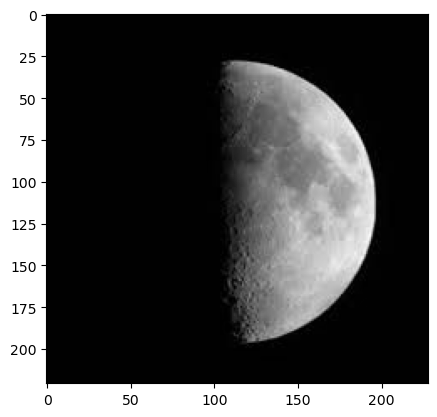

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from load_data import load_data, rgb2gray
from plot_clusters import plot_clusters
from cluster_kmeans import cluster_kmeans
from task2_test_kmeans import test_kmeans

data = load_data()
moon = data['moon']
moon = rgb2gray(moon)
plt.imshow(moon, cmap='gray')

In [2]:
def grayscaleImage2Vector(img):
    # Get the number of rows and columns
    shape = img.shape
    # Calculate the number of rows for the vector: rows * columns
    vector = np.reshape(img, (shape[0]*shape[1]))
    # Convert 1D array [...] to 2D array [[...]] for being able to use numpy functionality
    # The new shape should be compatible with the original shape.
    # If an integer, then the result will be a 1D array of that length. One shape dimension can be -1.
    vector = np.reshape(vector, (-1,1))
    return vector, shape

def vector2GrayscalImage(V, shape):
    return np.reshape(V, shape)

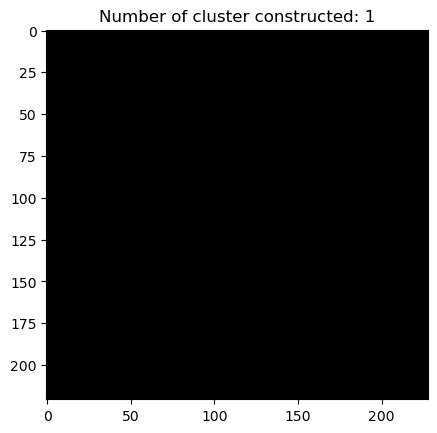

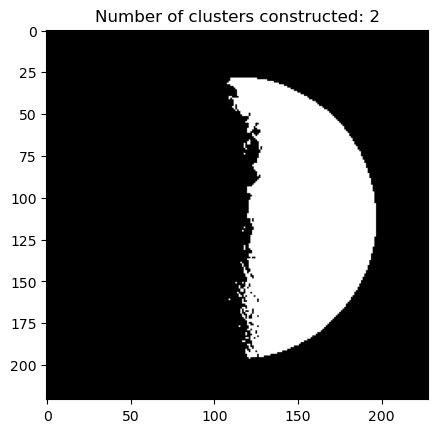

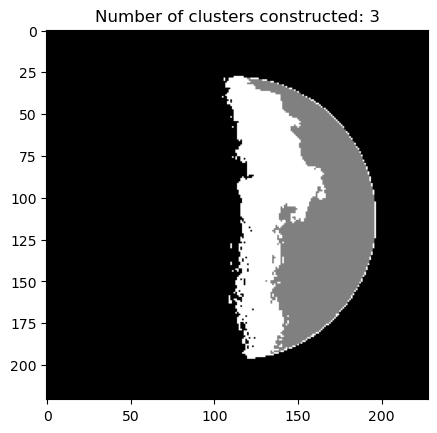

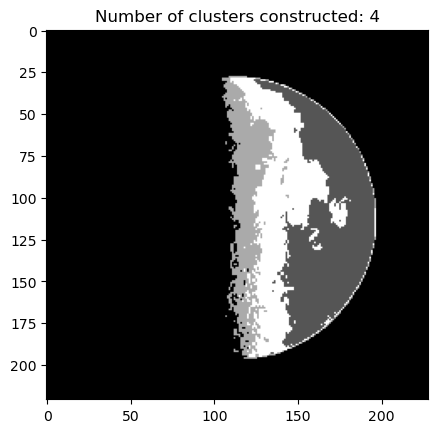

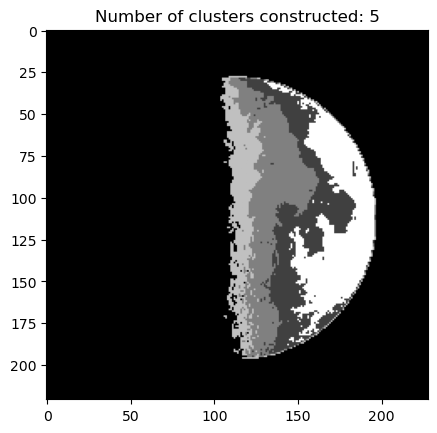

In [3]:
vector, orig_shape = grayscaleImage2Vector(moon)
# Construct vector template
alpha = np.ones(len(vector))
# Build some clusters
for n in np.arange(1, 6, 1):
    # Train the model with data / vector.
    kmeans = KMeans(n_clusters=n).fit(vector)
    # Apply the model to the data / vector.
    alpha = kmeans.predict(vector, n)
    # convert the brightness values of the picture according to the vector
    moon_after = vector2GrayscalImage(alpha, orig_shape)
    plt.title(f'Number of cluster{"" if n < 2 else "s"} constructed: {n}')
    plt.imshow(moon_after, cmap='gray')
    plt.show()